In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Exporatory Data Analytics**

In [2]:
import pandas as pd

In [3]:
# read dataset
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
# head of data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# tail of data
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# check information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# check unique value of ticket
print(len(df['Ticket'].unique()))

681


In [8]:
# check unique value of cabin
print(len(df['Cabin'].unique()))

148


In [9]:
# check unique value of embarked
print(len(df['Embarked'].unique()))

4


In [10]:
# drop unused column
drop = ['PassengerId', 'Name', 'Ticket']
df = df.drop(columns=drop)

In [11]:
# do encoding to convert object data type into numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Cabin'] = le.fit_transform(df['Cabin'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [13]:
# use knnimputer to fill missing value

import pandas as pd
from sklearn.impute import KNNImputer

import pandas as pd
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    float64
 8   Embarked  891 non-null    float64
dtypes: float64(9)
memory usage: 62.8 KB


In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,147.0,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,81.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,147.0,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,55.0,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,147.0,2.0


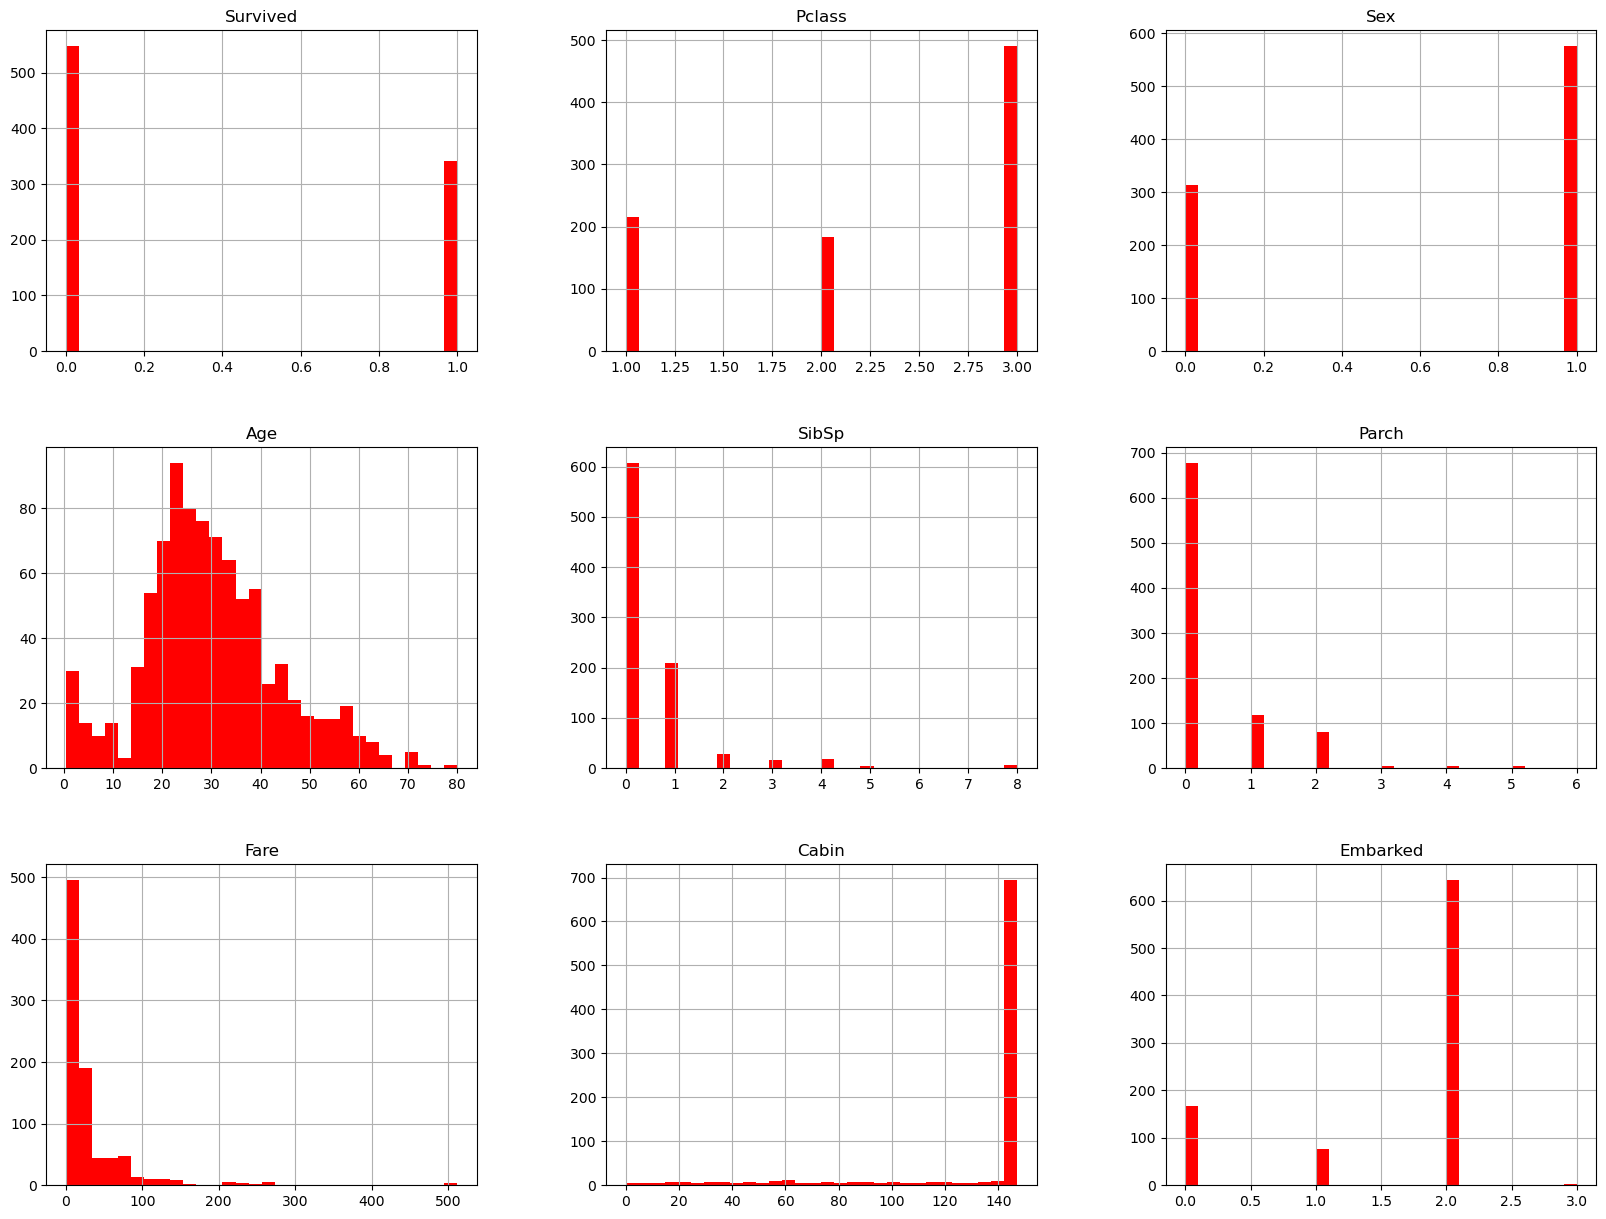

In [16]:
df.hist(bins = 30, figsize=(20, 15), color = 'red');df = df

In [17]:
df.corr().style.background_gradient(cmap="Blues")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.110237,-0.035322,0.081629,0.257307,-0.254888,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.340072,0.083081,0.018443,-0.549500,0.684121,0.157112
Sex,-0.543351,0.131900,1.000000,0.142088,-0.114631,-0.245489,-0.182333,0.096681,0.104057
Age,-0.110237,-0.340072,0.142088,1.000000,-0.251064,-0.192665,0.085982,-0.251711,-0.019491
SibSp,-0.035322,0.083081,-0.114631,-0.251064,1.000000,0.414838,0.159651,0.043593,0.066654
Parch,0.081629,0.018443,-0.245489,-0.192665,0.414838,1.000000,0.216225,-0.028324,0.038322
Fare,0.257307,-0.549500,-0.182333,0.085982,0.159651,0.216225,1.000000,-0.503355,-0.221226
Cabin,-0.254888,0.684121,0.096681,-0.251711,0.043593,-0.028324,-0.503355,1.000000,0.193205
Embarked,-0.163517,0.157112,0.104057,-0.019491,0.066654,0.038322,-0.221226,0.193205,1.000000


# **Feature Engineering**

In [18]:
X = df.drop(columns='Survived')
y = df['Survived']

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    float64
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    float64
 4   Parch     891 non-null    float64
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [20]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3.0,1.0,22.0,1.0,0.0,7.2500,147.0,2.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,81.0,0.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,147.0,2.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,55.0,2.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,147.0,2.0


# **Data Splitting**

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

# **Build The Model**

*decision tree*

In [22]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0,
                            criterion='entropy')

In [23]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [24]:
from sklearn.metrics import accuracy_score

# do a prediction using test data
npr_pred = dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, npr_pred)
acc_dtc

0.7653631284916201

In [25]:
from sklearn.metrics import classification_report
# make a classification report
print(classification_report(y_test, npr_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       106
         1.0       0.75      0.63      0.69        73

    accuracy                           0.77       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.76      0.77      0.76       179



<Axes: xlabel='Survived', ylabel='count'>

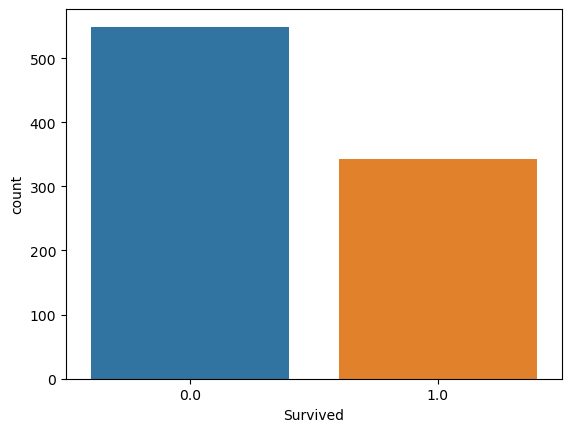

In [26]:
import seaborn as sns

sns.countplot(x=y)

In [27]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install --upgrade imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.0 MB/s eta 0:00:0000:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [29]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [30]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res,
                                                                    y_res,
                                                                    test_size=0.2,
                                                                    random_state=1)

In [31]:
dtc_res = DecisionTreeClassifier(random_state=0,
                            criterion='entropy')

In [32]:
dtc_res.fit(X_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
from sklearn.metrics import accuracy_score

# do a prediction using test data
ovsdtc_pred = dtc_res.predict(X_test)
acc_dtc = accuracy_score(y_test, ovsdtc_pred)
acc_dtc

0.9162011173184358

*ccp decison tree*

In [34]:
prdtc = DecisionTreeClassifier(random_state=11, 
          criterion='entropy')

In [35]:
path = prdtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [36]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=11,
                                 ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.21950041972561607


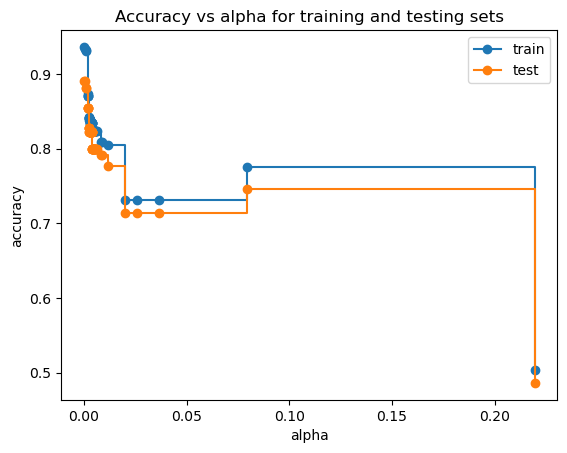

In [37]:
import matplotlib.pyplot as plt
train_scores = [clf.score(X_train_res, y_train_res) for clf in clfs]
test_scores = [clf.score(X_test_res, y_test_res) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [38]:
# in alpha -+0.3 accuracy model has incrased, use alpha 0.015 to pruning parameter (ccp_alpha)
# when more the alpha increases, the more the decision tree is cut
dtcpr = DecisionTreeClassifier(random_state=11,
                             ccp_alpha=0.001, 
                             criterion='entropy')
dtcpr.fit(X_train_res,y_train_res)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', random_state=11)

best model

In [39]:
# do a prediction and check accuracy score
dtcpr_pred = dtcpr.predict(X_test)
acc_dtcpr = accuracy_score(y_test, dtcpr_pred)
acc_dtcpr

0.9217877094972067

In [40]:
# print classification report
print(classification_report(y_test, dtcpr_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       106
         1.0       0.90      0.90      0.90        73

    accuracy                           0.92       179
   macro avg       0.92      0.92      0.92       179
weighted avg       0.92      0.92      0.92       179



In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaling
ss = StandardScaler() # Standardization
mms = MinMaxScaler() # MinMaxScaler

In [42]:
ss_X_train = ss.fit_transform(X_train)
ss_X_test = ss.fit_transform(X_test)
mms_X_train = mms.fit_transform(X_train)
mms_X_test = mms.fit_transform(X_test)

In [43]:
# fitting the train data into model
prdtc.fit(ss_X_train, y_train)

# do a prediction using test data
pr_pred = prdtc.predict(ss_X_test)
acc_ss_prdtc = accuracy_score(y_test, npr_pred)
print(f'accuration of Standarized Decision Tree : {acc_ss_prdtc}')

# fitting the train data into model
prdtc.fit(mms_X_train, y_train)

# do a prediction using test data
pr_pred=prdtc.predict(mms_X_test)
acc_mms_dtc = accuracy_score(y_test, npr_pred)
print(f'accuration of MinMaxScaled Decision Tree : {acc_mms_dtc}')

accuration of Standarized Decision Tree : 0.7653631284916201
accuration of MinMaxScaled Decision Tree : 0.7653631284916201


*bagging classifier*

In [44]:
# declare model bagging classifier with best parameter from hyperparameter tuning
from sklearn.ensemble import BaggingClassifier
bcl = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',random_state=11), 
                        n_estimators=50, max_samples=0.5, random_state=11, n_jobs=-1)

In [45]:
# fitting the model
bcl.fit(X_train_res, y_train_res)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   random_state=11),
                  max_samples=0.5, n_estimators=50, n_jobs=-1, random_state=11)

In [46]:
# do prediction with data test
bcl_pred = bcl.predict(X_test_res)

In [47]:
# write accuracy score
acc_bcl = accuracy_score(y_test_res, bcl_pred)
acc_bcl

0.8863636363636364

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,
                            criterion='entropy',
                            max_features=0.5,
                            min_samples_leaf=10,
                            random_state=11,
                            n_jobs=1)

In [49]:
# fit data train into model
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(criterion='entropy', max_features=0.5,
                       min_samples_leaf=10, n_jobs=1, random_state=11)

In [50]:
# do prediction
rf_pred = rf.predict(X_test_res)

In [51]:
# print accuracy score
acc_rf = accuracy_score(y_test_res, rf_pred)
acc_rf

0.8090909090909091

In [52]:
# print classification report
print(classification_report(y_test_res, rf_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       107
         1.0       0.85      0.76      0.80       113

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220



In [53]:
from sklearn.model_selection import RepeatedStratifiedKFold
def model(classifier):
    classifier.fit(X_train,y_train)
    ml_pred = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    print(classification_report(y_test, ml_pred))

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model(knn)

              precision    recall  f1-score   support

         0.0       0.70      0.89      0.78       106
         1.0       0.73      0.44      0.55        73

    accuracy                           0.70       179
   macro avg       0.71      0.66      0.66       179
weighted avg       0.71      0.70      0.69       179



In [55]:
from sklearn.svm import SVC
svm = SVC()
model(svm)

              precision    recall  f1-score   support

         0.0       0.66      0.91      0.76       106
         1.0       0.70      0.32      0.43        73

    accuracy                           0.66       179
   macro avg       0.68      0.61      0.60       179
weighted avg       0.67      0.66      0.63       179



In [56]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
model(mnb)

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.73       106
         1.0       0.60      0.37      0.46        73

    accuracy                           0.64       179
   macro avg       0.63      0.60      0.60       179
weighted avg       0.63      0.64      0.62       179



In [134]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [135]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [136]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [137]:
# drop unused column

drop = ['PassengerId', 'Name', 'Ticket']
test = test.drop(columns=drop)

In [138]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

test['Sex'] = le.fit_transform(test['Sex'])
test['Cabin'] = le.fit_transform(test['Cabin'])
test['Embarked'] = le.fit_transform(test['Embarked'])

In [139]:
import pandas as pd
from sklearn.impute import KNNImputer

import pandas as pd
from sklearn.impute import KNNImputer

# Buat objek KNNImputer dengan jumlah tetangga terdekat yang akan digunakan
imputer = KNNImputer(n_neighbors=3)

# Gunakan objek KNNImputer untuk mengisi nilai yang hilang dalam dataframe
test = pd.DataFrame(imputer.fit_transform(test), columns=test.columns)

In [140]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float64
 1   Sex       418 non-null    float64
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    float64
 4   Parch     418 non-null    float64
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    float64
 7   Embarked  418 non-null    float64
dtypes: float64(8)
memory usage: 26.2 KB


In [141]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3.0,1.0,34.5,0.0,0.0,7.8292,76.0,1.0
1,3.0,0.0,47.0,1.0,0.0,7.0000,76.0,2.0
2,2.0,1.0,62.0,0.0,0.0,9.6875,76.0,1.0
3,3.0,1.0,27.0,0.0,0.0,8.6625,76.0,2.0
4,3.0,0.0,22.0,1.0,1.0,12.2875,76.0,2.0


export and prediction

In [142]:
t = [[1.0, 0.0, 38.0, 1.0, 0.0, 71.2833, 81.0, 0.0]]

In [143]:
import numpy as np

test_arr = np.array(test)

In [144]:
import os
print(os.getcwd())  # Print current working directory

/kaggle/working


In [145]:
import pickle
with open('bcl-model.pkl', 'wb') as f:
    pickle.dump(bcl, f)

In [146]:
import pickle

# Load trained model
with open('/kaggle/working/bcl-model.pkl', 'rb') as f:
    model = pickle.load(f)

In [147]:
model.predict(t)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [148]:
result = model.predict(test_arr)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


In [149]:
print(result)

[0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.

In [153]:
results = pd.DataFrame(result)
results = results.rename(columns={0: 'Survived'})


In [154]:
results.head()

,Survived
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [155]:
len(results)

418

In [156]:
results.insert(0, 'PassengerId', range(892, 892 + len(result)))

In [158]:
results.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,0.0


In [160]:
results['Survived'] = results['Survived'].astype(int)

In [161]:
results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [164]:
results.to_csv('bcl-pred.csv')

In [165]:
results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [168]:
results.to_csv('bcl-predict.csv')

In [ ]:
# results.info()

In [ ]:
# results

In [ ]:
# results.to_csv('bcl-pred.csv', index=False)

In [ ]:
# results.to_csv("bcl-resuslts.csv", index=False, float_format='%.0f')

In [ ]:
# results_final = results['Survived']
# pd.DataFrame(results_final)

In [ ]:
# import pandas as pd

# # Assuming you have a Series named results_final
# results_final.name = 'y'

# results_final

In [ ]:
# import pandas as pd

# # Assuming you have a Series named results_final
# results_final = results_final.to_frame(name='y')

# results_final

In [ ]:
# results_final.to_csv('my_submission.csv', index=False)